### Analysis of the Correlation Between Home Prices and Rental Prices

The correlation coefficient between home prices in 2023 and rental prices from 2015 to 2023 is approximately 0.84. This indicates a strong positive relationship between the two variables. Here are some key insights from this correlation:

1. **Strong Positive Correlation**: With a correlation coefficient of 0.84, there exists a strong positive correlation between home prices and rental prices. This implies that as home prices increase over time, rental prices also tend to rise significantly.

2. **Impact on Housing Market Dynamics**: The strong correlation underscores the influence of home prices on rental prices within the housing market. This relationship can be attributed to various factors, including:
   - **Supply and Demand Dynamics**: Higher home prices often lead to decreased affordability for potential buyers, resulting in increased demand for rental properties and subsequently higher rental prices.
   - **Investor Behavior**: Rising home prices may attract more investors to the rental market, seeking to capitalize on both property appreciation and rental income.

3. **Implications for Policy and Decision-Making**: Understanding this correlation is crucial for policymakers and stakeholders involved in housing and real estate. Policy measures aimed at stabilizing or regulating home prices could have significant implications for rental markets and vicified period.

### Conclusion

In conclusion, the robust positive correlation between home prices and rental prices highlights the interdependence of these two segments within the real estate market. Recognizing and understanding this correlation is essential for making informed decisions in real estate investment, policy formulation, and market analysis.
ate stakeholders.


In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study Data Files
top_tier_sales_path = "output_data/top_tier_home_prices_by_state.csv"
bottom_tier_sales_path = "output_data/home_prices_by_state.csv"


# Read the data into DataFrames
top_tier_sales = pd.read_csv(top_tier_sales_path)
bottom_tier_sales = pd.read_csv(bottom_tier_sales_path)



In [81]:
# Step 1: Calculate the average home price for each year
average_prices = pd.DataFrame({'StateName': top_tier_sales['StateName']})  # Extract 'StateName' column
for year in range(2013, 2024):  # Loop through the years from 2013 to 2023
    # Calculate the average home price for each year
    average_prices[str(year)] = (top_tier_sales[str(year)] + bottom_tier_sales[str(year)]) / 2

# Step 2: Reset the index of the DataFrame and rename the index column
average_prices.reset_index(drop=True, inplace=True)

# Step 3: Drop the 'RealEstate' column if it exists
if 'RealEstate' in average_prices.columns:
    average_prices.drop(columns=['RealEstate'], inplace=True)

# Display the DataFrame with average home prices
average_prices.head()

,StateName,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AK,271200.0,277526.5,288418.0,295071.0,298954.5,308866.5,327003.5,338130.0,361205.5,386679.5,389067.5
1,AL,143003.0,147019.0,146941.5,150617.5,152499.5,154968.0,159684.0,167322.5,191177.0,212955.0,216725.5
2,AR,122541.5,122276.0,125813.5,131676.5,134300.5,138054.0,143260.0,149608.5,167337.5,181143.5,183413.5
3,AZ,177607.5,185597.5,198215.0,206481.5,215566.5,230685.0,251354.5,266222.0,331600.0,383898.5,375684.0
4,CA,257984.5,304555.5,321277.5,332221.0,356443.0,392847.5,406143.0,420818.5,494213.5,554661.5,532012.5


In [109]:
import os

# Check if the directory exists, if not, create it
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the Rental into a csv
average_prices.to_csv(f"{output_dir}/combined_home_prices_by_state.csv")

average_prices.head()

,StateName,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AK,271200.0,277526.5,288418.0,295071.0,298954.5,308866.5,327003.5,338130.0,361205.5,386679.5,389067.5
1,AL,143003.0,147019.0,146941.5,150617.5,152499.5,154968.0,159684.0,167322.5,191177.0,212955.0,216725.5
2,AR,122541.5,122276.0,125813.5,131676.5,134300.5,138054.0,143260.0,149608.5,167337.5,181143.5,183413.5
3,AZ,177607.5,185597.5,198215.0,206481.5,215566.5,230685.0,251354.5,266222.0,331600.0,383898.5,375684.0
4,CA,257984.5,304555.5,321277.5,332221.0,356443.0,392847.5,406143.0,420818.5,494213.5,554661.5,532012.5


In [82]:
# Step 1: Calculate the change in home prices from 2013 to 2023
average_prices['Change'] = average_prices['2023'] - average_prices['2013']

# Step 2: Sort the StateNames based on the calculated change
sorted_df = average_prices.sort_values(by='Change', ascending=False)

# Step 3: Select the top 5 StateNames with the highest change
top_5_state_names = sorted_df.head(5)['StateName'].tolist()

# Display the top 5 StateNames with the highest change
print("Top 5 StateNames with the highest change in home prices from 2013 to 2023:")
for state_name in top_5_state_names:
    print(state_name)


Top 5 StateNames with the highest change in home prices from 2013 to 2023:
HI
UT
CO
MA
CA


In [91]:
top_5_state_names = average_prices[average_prices['StateName'].isin(['HI', 'UT', 'CO', 'MA', 'CA'])]

# Set the StateName column as the index
top_5_state_names.set_index('StateName', inplace=True)

# Transpose the DataFrame to have years as rows and states as columns
transposed_data = top_5_state_names.transpose()

top_5_state_names.head()



,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Change
StateName,,,,,,,,,,,,
CA,257984.5,304555.5,321277.5,332221.0,356443.0,392847.5,406143.0,420818.5,494213.5,554661.5,532012.5,274028.0
CO,267399.0,282267.0,311150.5,318601.5,348024.0,369490.5,385082.0,400824.0,479671.5,560286.5,558694.5,291295.5
HI,553076.0,604763.5,628275.0,653701.5,680449.0,713817.5,735573.0,750774.5,853038.0,1024380.5,1031331.0,478255.0
MA,330253.5,350835.5,361333.0,372900.0,389410.0,412396.0,424167.5,435741.0,526312.5,588284.0,606314.5,276061.0
UT,230254.5,241565.0,256291.0,263978.5,287767.0,315031.5,343549.5,371075.5,468450.5,543914.5,525202.0,294947.5


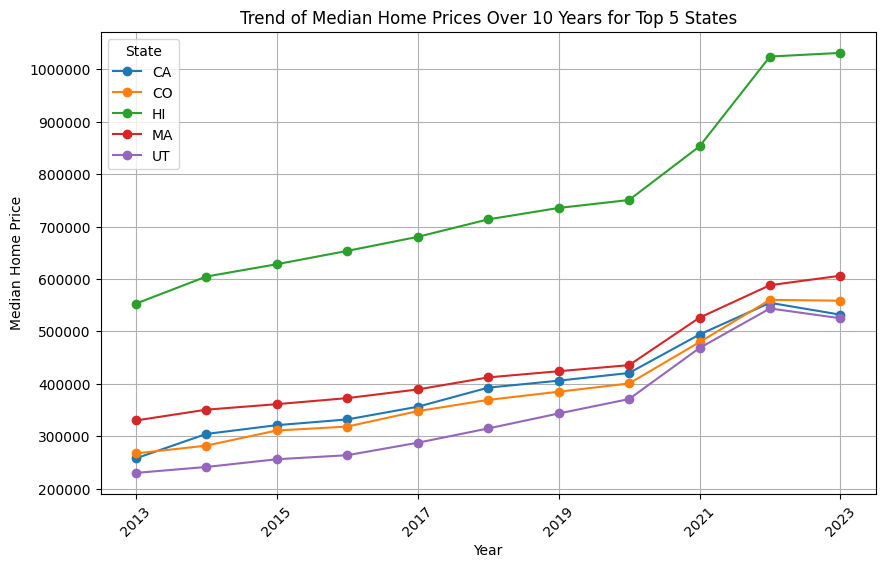

In [97]:
# Drop the "Change" column
average_prices = average_prices.drop(columns=['Change'])

# Filter the DataFrame to include only the data for the top 5 states
top_5_state_names = average_prices[average_prices['StateName'].isin(['HI', 'UT', 'CO', 'MA', 'CA'])]

# Set the StateName column as the index
top_5_state_names.set_index('StateName', inplace=True)

# Transpose the DataFrame to have years as rows and states as columns
transposed_data = top_5_state_names.transpose()

# Plot the data using a line plot
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
transposed_data.plot(kind='line', figsize=(10, 6), marker='o', ax=ax)

# Set the title and labels
plt.title('Trend of Median Home Prices Over 10 Years for Top 5 States')
plt.xlabel('Year')
plt.ylabel('Median Home Price')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='State')
plt.grid(True)
plt.show()

In [98]:
# Step 1: Calculate the change in home prices from 2013 to 2023
average_prices['Change'] = average_prices['2023'] - average_prices['2013']

# Step 2: Sort the StateNames based on the calculated change in ascending order
sorted_df = average_prices.sort_values(by='Change', ascending=True)

# Step 3: Select the top 5 StateNames with the lowest change
bottom_5_state_names = sorted_df.head(5)['StateName'].tolist()

# Display the top 5 StateNames with the lowest change
print("Top 5 StateNames with the lowest change in home prices from 2013 to 2023:")
for state_name in bottom_5_state_names:
    print(state_name)


Top 5 StateNames with the lowest change in home prices from 2013 to 2023:
LA
ND
MS
IL
NM


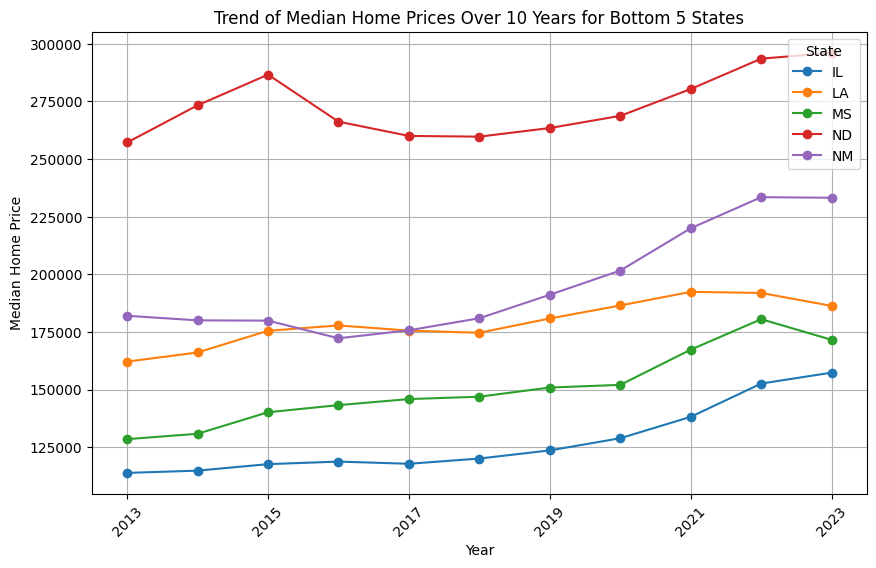

In [99]:
# Drop the "Change" column
average_prices = average_prices.drop(columns=['Change'])

# Filter the DataFrame to include only the data for the bottom 5 states with the lowest change
bottom_5_state_names = average_prices[average_prices['StateName'].isin(['LA', 'ND', 'MS', 'IL', 'NM'])]

# Set the StateName column as the index
bottom_5_state_names.set_index('StateName', inplace=True)

# Transpose the DataFrame to have years as rows and states as columns
transposed_data = bottom_5_state_names.transpose()

# Plot the data using a line plot
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
transposed_data.plot(kind='line', figsize=(10, 6), marker='o', ax=ax)

# Set the title and labels
plt.title('Trend of Median Home Prices Over 10 Years for Bottom 5 States')
plt.xlabel('Year')
plt.ylabel('Median Home Price')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='State')
plt.grid(True)
plt.show()

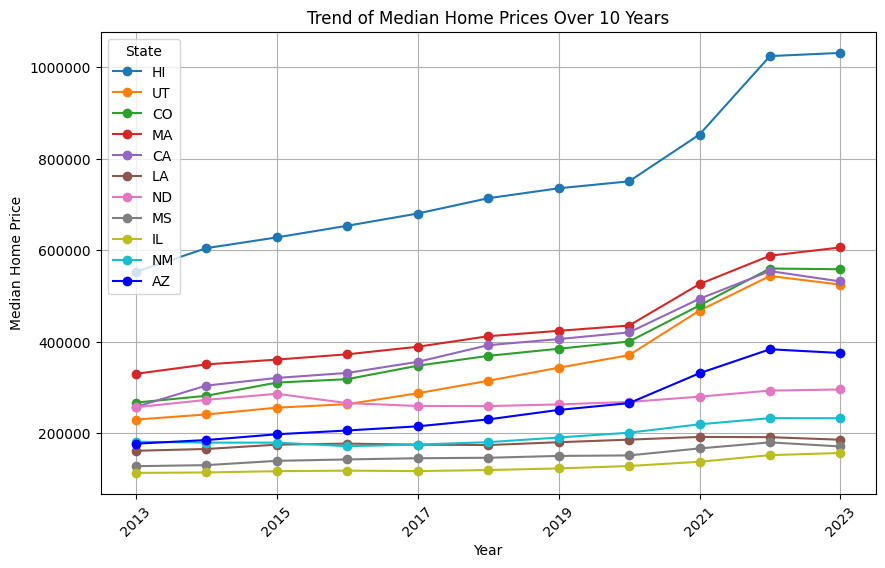

In [102]:
# Define the top 5 and bottom 5 states
top_5_states = ['HI', 'UT', 'CO', 'MA', 'CA']
bottom_5_states = ['LA', 'ND', 'MS', 'IL', 'NM']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))
ax.ticklabel_format(style='plain')

# Plot the data for the top 5 states
average_prices.set_index('StateName').loc[top_5_states].T.plot(kind='line', marker='o', ax=ax)

# Plot the data for the bottom 5 states
average_prices.set_index('StateName').loc[bottom_5_states].T.plot(kind='line', marker='o', ax=ax)

# Plot the data for Arizona (AZ)
average_prices.set_index('StateName').loc[['AZ']].T.plot(kind='line', marker='o', ax=ax, color='b', label='AZ')

# Set the title and labels
plt.title('Trend of Median Home Prices Over 10 Years')
plt.xlabel('Year')
plt.ylabel('Median Home Price')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend(title='State')

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


In [104]:
# Load the rental data
rental_data = pd.read_csv('output_data/rentals_by_state.csv')

# Drop the 'Unnamed: 0' column
rental_data.drop(columns=['Unnamed: 0', 'Increase'], inplace=True)

# Display the first few rows of the rental data to confirm the column has been dropped
rental_data.head()

,StateName,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AK,1222.0,1210.0,1196.0,1205.0,1219.0,1236.0,1371.0,1539.0,1624.0
1,AL,859.0,889.0,949.0,981.0,1035.0,1106.0,1193.0,1289.0,1285.0
2,AR,894.0,861.0,914.0,923.0,953.0,986.0,1049.0,1134.0,1080.0
3,AZ,937.0,984.0,1034.0,1197.0,1295.0,1364.0,1626.0,1564.0,1568.0
4,CA,1507.0,1635.0,1778.0,1898.0,1994.0,2028.0,2207.0,2331.0,2240.0


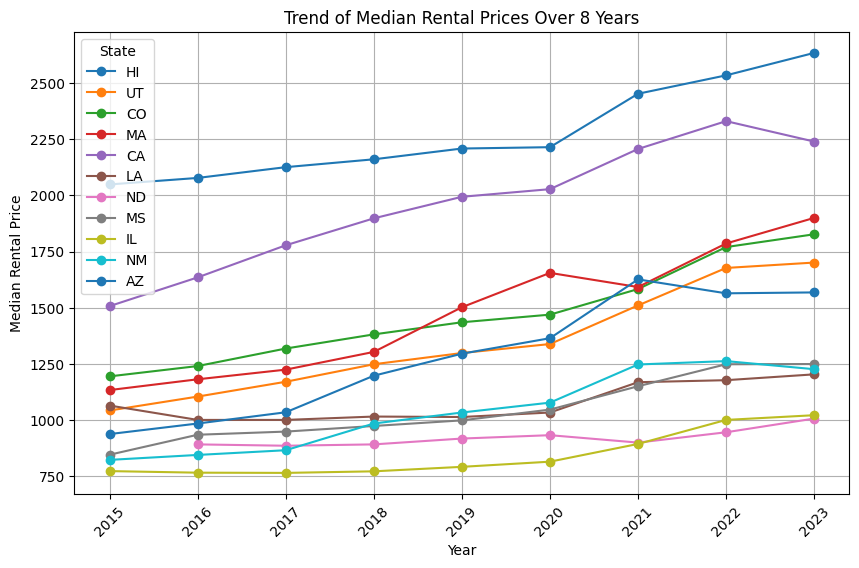

In [110]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Specify the states to plot
states_to_plot = ['HI', 'UT', 'CO', 'MA', 'CA', 'LA', 'ND', 'MS', 'IL', 'NM', 'AZ']

# Plot the rental data for the specified states
rental_data.set_index('StateName').loc[states_to_plot].T.plot(kind='line', marker='o', ax=ax)

# Set the title and labels
plt.title('Trend of Median Rental Prices Over 8 Years')
plt.xlabel('Year')
plt.ylabel('Median Rental Price')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend(title='State')

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


In [108]:
# Merge the modified home sale data with the rental data on the 'StateName' column
merged_data = pd.merge(average_prices, rental_data, on='StateName')

# Define the list of columns for correlation excluding 'StateName'
columns_for_correlation = ['2015_x', '2016_x', '2017_x', '2018_x', '2019_x', '2020_x', '2021_x', '2022_x', '2023_x',
                           '2015_y', '2016_y', '2017_y', '2018_y', '2019_y', '2020_y', '2021_y', '2022_y', '2023_y']

# Calculate the correlation coefficient between home prices and rental prices for each state
correlation = merged_data[columns_for_correlation].corr().loc['2023_x', '2023_y']

# Print the correlation coefficient
print("Correlation coefficient between home prices in 2023 and rental prices from 2015 to 2023:", correlation)


Correlation coefficient between home prices in 2023 and rental prices from 2015 to 2023: 0.8365980858540978


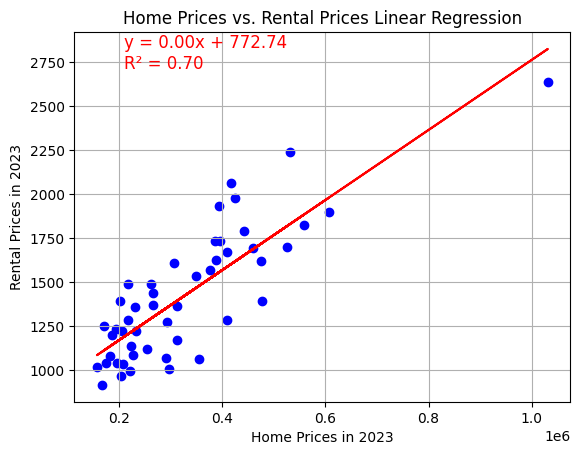

In [124]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    """
    Generate a linear regression plot.

    Parameters:
    x_values (Series): The x values for the plot.
    y_values (Series): The y values for the plot.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    """
    slope, intercept, rvalue, _, _ = linregress(x_values, y_values)
    
    # Plot scatter and regression line
    plt.scatter(x_values, y_values, color='blue', label='Data')
    plt.plot(x_values, slope * x_values + intercept, color='red', label='Linear Regression')
    
    # Annotate the line equation
    equation_text = f'y = {slope:.2f}x + {intercept:.2f}\nR\u00b2 = {rvalue**2:.2f}'
    plt.text(0.1, 0.9, equation_text, fontsize=12, color='red', transform=plt.gca().transAxes)
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Show the plot
    plt.grid(True)
    plt.show()

# Linear regression for real estate data
plot_linear_regression(merged_data['2023_x'], merged_data['2023_y'],
                        "Home Prices vs. Rental Prices Linear Regression",
                        "Home Prices in 2023", "Rental Prices in 2023")
